In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

### One-Step Method

1. Forward Euler Method

2. Backward Euler Method

3. Trapezoidal Method

4. Runge-Kutta Methods (includes 2 and 4 stages)

Solve the following questions using different schemes.

#### Examples:  Simple radioactive decay
   
Differential Equation: $\frac{\text{d} u}{\text{d}t} = -\lambda u $, where $\lambda = \frac {\ln 2}{1600}$

Initial Conditions: $u(0) = c_0$

Solution $c(t) = c_0 e^{-\lambda t}$

So this is an initial value problem (or IVP)

#### 1. Forward Euler Method

$$U_{n+1} = U_n + \Delta t f(t, \vec u)$$

This is obviously a explicit method, because we need to know funtion $f(u, t)$ in order to evaluate $U_{n+1}$.

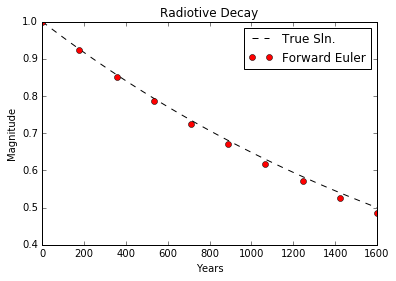

In [28]:
#Problem Statement
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
f = lambda u: -decay_constant * u #forcing function
#True Solutions
t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

#Forward Euler Method
num_eval = 10 #Nubmer of evaluation
t_euler = numpy.linspace(0.0, 1.6e3, num_eval)
delta_t = t_euler[1] - t_euler[0]

u_euler = numpy.empty(num_eval)
u_euler[0] = c_0 #Apply initial condition given
for (n, t_n) in enumerate(t_euler[:-1]): #Watch the technique here, if go to the last element, will be out of index
    u_euler[n+1] = u_euler[n] + delta_t * f(u_euler[n])
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_exact, u_exact, 'k--', label = 'True Sln.')
axes.plot(t_euler, u_euler, 'ro', label = 'Forward Euler')
axes.set_title('Radiotive Decay')
axes.set_xlabel('Years')
axes.set_ylabel('Magnitude')
axes.legend(loc = 1)
plt.show()

#### 2. Backward Euler Method

$U_{n-1}$ is existing known data, use this to evaluate $U_{n}$. In other words,

$$\frac {du}{dt} = \lambda u ~~ \Rightarrow ~~ \frac{U_n - U_{n-1}}{\Delta t} = \lambda U_n ~~ \Rightarrow ~~ U_n = \frac{1}{1 + \lambda \Delta t} U_{n-1}$$

This is an implicit method, because $f(u,t)$ is not needed to evaluate $U_n$.

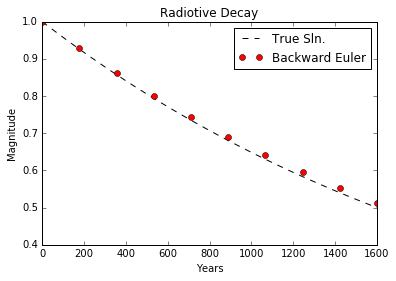

In [37]:
#Problem Statement
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
#A implicit method does not need to know forcing function
#f = lambda u: -decay_constant * u
#True Solutions
t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

#Backward Euler Method
num_eval = 10
t_euler = numpy.linspace(0.0, 1.6e3, num_eval)
u_euler = numpy.empty(num_eval)
delta_t = t_euler[1] - t_euler[0]
u_euler[0] = c_0 #Initial Value
for n in xrange(1, num_eval): # n = 1 ~ 9
    u_euler[n] = u_euler[n -1] / (1.0 + decay_constant * delta_t)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_exact, u_exact, 'k--', label = 'True Sln.')
axes.plot(t_euler, u_euler, 'ro', label = 'Backward Euler')
axes.set_title('Radiotive Decay')
axes.set_xlabel('Years')
axes.set_ylabel('Magnitude')
axes.legend(loc = 1)
plt.show()

#### 3. Trapezoidal Method

Rearrange Trapezoidal quadruture: 

$$\begin{align}
\int_{t_n}^{t_n + \Delta t} u'(t) dt & = \frac{\Delta t}{2} (f(t_{i+1}) + f(t_i)) \\ 
U_{n+1} - U_n &= \frac{\Delta t}{2} [f(U_{n+1}) + f(U_n)] \\
U_{n+1} - U_n & = \frac{\Delta t}{2} [f(U_{n+1}) + f(U_n)]
\end{align}$$

Since $f(U_n) = \lambda U_n$

$$\frac{U_{n+1} - U_n}{\Delta t} = \frac{\lambda U_n + \lambda U_{n+1}}{2}$$

$$\therefore ~ U_{n+1} = \frac{2 + \lambda \Delta t}{2 - \lambda \Delta t} U_n$$

This one is also an implicit method.

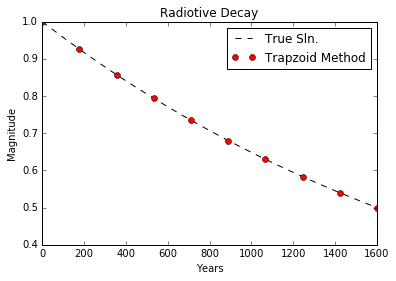

In [48]:
#Problem Statement
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
#A implicit method does not need to know forcing function
#f = lambda u: -decay_constant * u
#True Solutions
t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

#Trapzoid Method
num_eval = 10
t_trap = numpy.linspace(0.0, 1.6e3, num_eval)
u_trap = numpy.empty(num_eval)
delta_t = t_trap[1] - t_trap[0]
u_trap[0] = c_0
integration_constant = (1.0 - decay_constant * delta_t / 2.0) / (1.0 + decay_constant * delta_t / 2.0)
#Why this doesn't work??
#integration_constant = (2.0 + decay_constant * delta_t) / (2.0 - decay_constant * delta_t)
for n in xrange(1, num_eval): # n = 1 ~ 9
    u_trap[n] = u_trap[n - 1] * integration_constant
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_exact, u_exact, 'k--', label = 'True Sln.')
axes.plot(t_trap, u_trap, 'ro', label = 'Trapzoid Method')
axes.set_title('Radiotive Decay')
axes.set_xlabel('Years')
axes.set_ylabel('Magnitude')
axes.legend(loc = 1)
plt.show()

#### 4. Runge-Kutta Methods

Taylor Series give 
$$\begin{align*}
u(t_{n+1}) = u(t_n) + \Delta t u'(t_n) + \frac{\Delta t^2}{2} u''(t_n) + \frac{\Delta t^3}{6} u'''(t_n) + \cdots + \frac{\Delta t^p}{p!} u^{(p)}(t_n)
\end{align*}$$

Substitute derivatives of $u(t)$ by relation

$$\begin{align}
\frac{du}{dt} &= f(u) \\
\frac{d^2u}{dt^2} &= f'(t) \\
\vdots
\end{align}$$

Therefore,

$$u(t_{n+1}) = u(t_n) + \Delta t f(t_n, u(t_n)) + \frac{\Delta t^2}{2} f'(t_n, u(t_n)) + \frac{\Delta t^3}{6} f''(t_n, u(t_n)) + \cdots + \frac{\Delta t^p}{p!} f^{(p-1)}(t_n, u(t_n)).
$$

#### Two-stage Runge-Kutta method only wants term up to first order.

##### Step 1: Calculate solution at midpoint $t^* = t_n + \frac{\Delta t}{2}$ using Euler's method.

$$\begin{align}
\frac{du}{dt} &= f(u,t) \\
\frac{U^* - U_n}{\frac{1}{2} \Delta t} &= f(U_n)
\end{align}$$

##### Step 2: Apply 1st order term of Taylor's Series to evaluate $U_{n+1}$

$$U_{n+1} = U_n + \Delta t \cdot f(U^*) = U_n + \Delta t \cdot f(U_n + \frac{1}{2} \Delta t \cdot f(U_n))$$

##### Runge-Kutta Method is directly given as 

$$\begin{aligned}
    Y_1 &= U_n \\
    Y_2 &= U_n + \frac{1}{2} \Delta t f(Y_1, t_n) \\
    Y_3 &= U_n + \frac{1}{2} \Delta t f(Y_2, t_n + \Delta t / 2) \\
    Y_4 &= U_n + \Delta t f(Y_3, t_n + \Delta t / 2) \\
    U_{n+1} &= U_n + \frac{\Delta t}{6} \left [f(Y_1, t_n) + 2 f(Y_2, t_n + \Delta t / 2) + 2 f(Y_3, t_n + \Delta t/2) + f(Y_4, t_n + \Delta t) \right ]
\end{aligned}$$

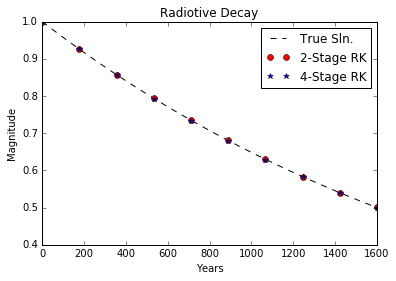

In [58]:
#Problem Statement
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
f = lambda u: -decay_constant * u #forcing function
#True Solutions
t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

#RK2 method
num_eval = 10
t_rk2 = numpy.linspace(0.0, 1.6e3, num_eval)
u_rk2 = numpy.empty(num_eval)
delta_t = t_rk2[1] - t_rk2[0]
u_rk2[0] = c_0 #Initial Value
for n in xrange(num_eval-1): #n = 0 ~ 9
    u_star = u_rk2[n] + delta_t * f(u_rk2[n]) / 2.0 #Use Forward Euler to calculate midpoint
    u_rk2[n + 1] = u_rk2[n] + delta_t * f(u_star)
    
#RK4 method
num_eval = 10
t_rk4 = numpy.linspace(0.0, 1.6e3, num_eval)
u_rk4 = numpy.empty(num_eval)
u_rk4[0] = c_0 #Initial Value
for n in xrange(num_eval-1): #n = 0 ~ 9
    Y_1 = u_rk4[n]
    Y_2 = u_rk4[n] + delta_t / 2.0 * f(Y_1) 
    Y_3 = u_rk4[n] + delta_t / 2.0 * f(Y_2) 
    Y_4 = u_rk4[n] + delta_t * f(Y_3)
    u_rk4[n + 1] = u_rk4[n] + delta_t / 6.0 * (f(Y_1) + 2.0 * f(Y_2) + 2.0 * f(Y_2) + f(Y_3))

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_exact, u_exact, 'k--', label = 'True Sln.')
axes.plot(t_rk2, u_rk2, 'ro', label = '2-Stage RK')
axes.plot(t_rk4, u_rk4, 'b*', label = '4-Stage RK')
axes.set_title('Radiotive Decay')
axes.set_xlabel('Years')
axes.set_ylabel('Magnitude')
axes.legend(loc = 1)
plt.show()

### Multi-step methods

1. Leap-Frog method

2. Adams-Bashforth Method

3. Adams-Moulton Method

4. Predictor-Corrector Methods

All linear multi-step methods can be written as the linear combination of past, present and future solutions:
$$
\sum^r_{j=0} \alpha_j U_{n+j} = \Delta t \sum^r_{j=0} \beta_j f(U_{n+j}, t_{n+j})
$$

If $\beta_r = 0$ then the method is explicit. That means U_r is estimated based on previous time steps.  

In practice a normalization of $\alpha_r = 1$ is used in order to simplify coefficieint combinations.

A multi-step is not self-started. It needs other methods to create $U_2$, $U_3$... according to its scheme.

Now condiser the radiotive decay probelm shown in one-step methods. Use different nulti-step methods to solve it.

#### 1. Leap-Frog Method (centered difference method)

Recall 2nd order centered difference

$$\frac{du}{dt} = \frac{1}{2\Delta t}[U_{n+1} - U_{n-1}]$$

This is a implicit method, which means it has to combine differential equation $\frac{du}{dt} = f(u,t)$ and to know $f(u,t)$ in advance.

$$\begin{align}
\frac{du}{dt} = \frac{1}{2\Delta t}[U_{n+1} - U_{n-1}] = f(U_n) \\
U_{n+1} = U_{n-1} + 2 \Delta t f(U_n)
\end{align}$$

Starting n from 0, the first value estimated is $U_2$. Here $U_1$ needs to be computed by other method (Euler in this case).

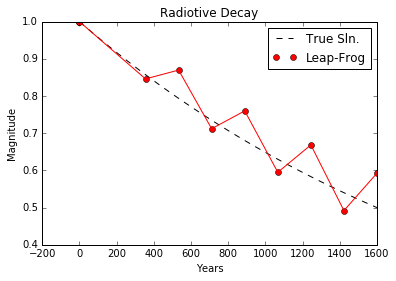

In [69]:
#Problem Statement
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
f = lambda u: -decay_constant * u #forcing function
#True Solutions
t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

num_eval = 10
t_leapfrog = numpy.linspace(0.0, 1.6e3, num_eval)
u_leapfrog = numpy.empty(num_eval)
delta_t = t_leapfrog[1] - t_leapfrog[0]
u_leapfrog[0] = c_0 #Initial Condition
t_leapfrog[1] = t_leapfrog[0] + delta_t * f(u_leapfrog[0])
for n in xrange(1, num_eval -1): # n = 1 ~ 8
    u_leapfrog[n + 1] = u_leapfrog[n - 1] + 2.0 * delta_t * f(u_leapfrog[n])
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_exact, u_exact, 'k--', label = 'True Sln.')
axes.plot(t_leapfrog, u_leapfrog, 'ro', label = 'Leap-Frog')
axes.plot(t_leapfrog, u_leapfrog, 'r')
axes.set_title('Radiotive Decay')
axes.set_xlabel('Years')
axes.set_ylabel('Magnitude')
axes.legend(loc = 1)
plt.show()

#### 2. Adams-Bashforth Methods

This method is accomplished by taking up to rth order terms of Taylor's series. Then substitute $u^{(n)}(t)$ by $u'(t) = \frac{U_{n+1} ~ -  ~ U_n}{2} ...$

$$\begin{aligned}
    \text{1-step:} & ~ & U_{n+1} &= U_n +\Delta t f(U_n) \\
    \text{2-step:} & ~ & U_{n+2} &= U_{n+1} + \frac{\Delta t}{2} (-f(U_n) + 3 f(U_{n+1})) \\
    \text{3-step:} & ~ & U_{n+3} &= U_{n+2} + \frac{\Delta t}{12} (5 f(U_n) - 16 f(U_{n+1}) + 23 f(U_{n+2})) \\
    \text{4-step:} & ~ & U_{n+4} &= U_{n+3} + \frac{\Delta t}{24} (-9 f(U_n) + 37 f(U_{n+1}) -59 f(U_{n+2}) + 55 f(U_{n+3}))
\end{aligned}$$

Note that 1-step version of Adams-Bashforth is actually forward Euler method!

Since the right-hand-side of equations is one-step less than left-hand-side, we call Adams-Bashforth a explicit method. In other words, only previous time stamps are required.

Here use RK2 to compensate missing initial conditions.

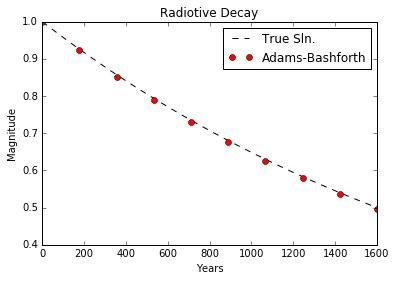

In [79]:
#Problem Statement
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
f = lambda u: -decay_constant * u #forcing function
#True Solutions
t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

num_eval = 10
t_ab3 = numpy.linspace(0.0, 1.6e3, num_eval)
u_ab3 = numpy.empty(num_eval)
delta_t = t_ab3[1] - t_ab3[0]
u_ab3[0] = c_0 #Initial Condtion
#Use RK2 to make up U1 and U2
for n in xrange(3):
    u_ab3[n + 1] = u_ab3[n] + 0.5 * delta_t * f(u_ab3[n])
    u_ab3[n + 1] = u_ab3[n] + delta_t * f(u_ab3[n])

for n in xrange(num_eval - 3): # n = 0 ~ (num_eval-3 -1)
    u_ab3[n + 3] = u_ab3[n + 2] + delta_t / 12.0 * (5.0 * f(u_ab3[n]) - 16.0 * f(u_ab3[n + 1]) + 23.0 * f(u_ab3[n + 2]))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_exact, u_exact, 'k--', label = 'True Sln.')
axes.plot(t_ab3, u_ab3, 'ro', label = 'Adams-Bashforth')
axes.set_title('Radiotive Decay')
axes.set_xlabel('Years')
axes.set_ylabel('Magnitude')
axes.legend(loc = 1)
plt.show()

#### 3. Adams-Moulton Method

This is a implicit version of Adams-Bashforth method. Since this gives one additional parameter to use  βrβr  these methods are generally one order of accuracy greater than their counterparts.

$$\begin{aligned}
    \text{1-step:} & ~ & U_{n+1} &= U_n + \frac{\Delta t}{2} (f(U_n) + f(U_{n+1})) \\
    \text{2-step:} & ~ & U_{n+2} &= U_{n+1} + \frac{\Delta t}{12} (-f(U_n) + 8f(U_{n+1}) + 5f(U_{n+2})) \\
    \text{3-step:} & ~ & U_{n+3} &= U_{n+2} + \frac{\Delta t}{24} (f(U_n) - 5f(U_{n+1}) + 19f(U_{n+2}) + 9f(U_{n+3})) \\
    \text{4-step:} & ~ & U_{n+4} &= U_{n+3} + \frac{\Delta t}{720}(-19 f(U_n) + 106 f(U_{n+1}) -264 f(U_{n+2}) + 646 f(U_{n+3}) + 251 f(U_{n+4}))
\end{aligned}$$

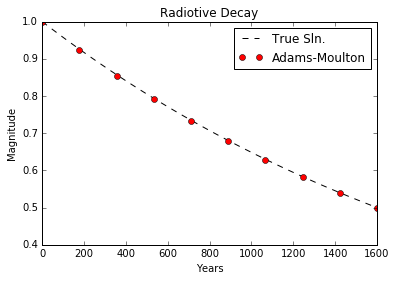

In [112]:
#Problem Statement
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
f = lambda u: -decay_constant * u #forcing function
#True Solutions
t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

num_eval = 10
t_am2 = numpy.linspace(0.0, 1.6e3, num_eval)
u_am2 = numpy.zeros(num_eval)
delta_t = t_am2[1] - t_am2[0]
u_am2[0] = c_0 # Initial Condition
u_am2[1] = u_am2[0] + delta_t * f(u_am2[0]) # Forward Euler

#Why not 1.0 - 5.0 / 12.0??
#integration_constant = numpy.array([-decay_constant / 12.0, (1.0 + 2.0 / 3.0 * delta_t * decay_constant)])
#integration_constant /= (1.0 - 5.0 / 12.0 * delta_t * decay_constant )

integration_constant = numpy.array([delta_t * decay_constant / 12.0, (1.0 - 8.0 / 12.0 * delta_t * decay_constant)])
integration_constant /= (1.0 + 5.0 / 12.0 * delta_t * decay_constant )
for  n in xrange(num_eval - 2): # n = 0 ~ 7
    for j in xrange(0, 2):
        u_am2[n + 2] += integration_constant[j] * u_am2[n + j]
        
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_exact, u_exact, 'k--', label = 'True Sln.')
axes.plot(t_am2, u_am2, 'ro', label = 'Adams-Moulton')
axes.set_title('Radiotive Decay')
axes.set_xlabel('Years')
axes.set_ylabel('Magnitude')
axes.legend(loc = 1)
plt.show()

#### 4. Predictor-Corrector Methods

Consider 1-Step Adams-Moulton method 

$$U_{n+1} = U_n + \frac{\Delta t}{2} (f(U_n) + f(U_{n+1}))$$

Instead of substituting $f(U_{n+1})$ and rearrange the equation, use another explicit method to predict $f(U_{n+1})$. And use Adams-Moulton method (or the corrector) to make the solution more accurate.

$$\begin{aligned}
    \hat{U}_{n+1} &= U_n + \Delta t f(U_n) \\
    U_{n+1} &= U_n + \frac{1}{2} \Delta t [ ~ f(U_n) + f(\hat{U}_{n+1}) ~ ] 
\end{aligned}$$
##### This method leads to a second order accurate method only in 1-Step estimation.

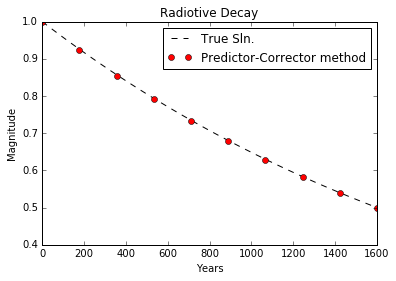

In [114]:
#Problem Statement
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
f = lambda u: -decay_constant * u #forcing function
#True Solutions
t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

num_eval = 10
t_pc = numpy.linspace(0.0, 1.6e3, num_eval)
u_pc = numpy.zeros(num_eval)
delta_t = t_pc[1] - t_pc[0]

for n in xrange(num_eval - 1): #n = 0 ~ 8
    u_pc[n + 1] = u_pc[n] + delta_t * f(u_pc[n])
    u_pc[n + 1] = u_pc[n] + 0.5 * delta_t * (f(u_pc[n]) + f(u_pc[n + 1]))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_exact, u_exact, 'k--', label = 'True Sln.')
axes.plot(t_am2, u_am2, 'ro', label = 'Predictor-Corrector method')
axes.set_title('Radiotive Decay')
axes.set_xlabel('Years')
axes.set_ylabel('Magnitude')
axes.legend(loc = 1)
plt.show()